Code to create figure 1 of the article.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


First we take the data of migrant words created in the Create_migrants file.

In [3]:
migrant = pd.read_csv("Migrant/migrant_1800.csv")
migrant.drop(migrant.columns[0],inplace=True,axis=1)
migrant

,word,year,count,language,Rank
0,aa,1801,96,italian,4084.0
1,aa,1801,598,spanish,4473.0
2,aa,1807,4849,french,2994.0
3,aa,1942,3169,german,4923.0
4,abandon,1800,3124,english,3156.0
...,...,...,...,...,...
14351,états,1810,528,italian,2840.0
14352,étoit,1800,151690,french,8.0
14353,étoit,1816,475,german,4194.0
14354,étranger,1800,12974,french,788.0


In [4]:
decades = np.arange(1900,2010,10)
languages = ["english","spanish","french","german","italian"]

The "migrants" function let's us find all the migrant words that originated from language_out and got into "language_in" inside a set of years.

In [5]:
def migrants(language_out,language_in,years,exclude):
    
    migrant_df = pd.read_csv("Migrant/migrant_1800"
                             + ".csv")
    migrant_df.drop(migrant_df.columns[0],inplace=True,axis=1)
    
    #Take only the first appearances of words
    first_appearance = migrant_df.drop_duplicates(subset='word', 
                                keep='first')
    
    #take the words created by the out language.
    out_words = first_appearance[first_appearance["language"] == language_out ]
    
    #Take the words that
    migrated_from_out = migrant_df[(migrant_df["word"].isin(out_words["word"])) & 
                               (migrant_df["year"].isin(years)) &
                                (migrant_df["language"] == language_in)
                               ]
    return(migrated_from_out)

print("Words from english to spanish that reached spanish during the 90s")
migrants("english","spanish",range(1990,2000),"")

Words from english to spanish that reached spanish during the 90s


,word,year,count,language,Rank
215,agenda,1991,35093,spanish,4702.0
1361,bilateral,1991,34104,spanish,4816.0
1595,bush,1990,39332,spanish,4209.0
1691,cambridge,1990,34349,spanish,4758.0
2303,clinton,1993,36014,spanish,4717.0
5575,gradual,1990,33766,spanish,4835.0
5861,history,1991,40544,spanish,4102.0
6558,internet,1996,48129,spanish,3972.0
7121,laura,1998,45885,spanish,4878.0
7697,mail,1999,57520,spanish,4055.0


We create lists of the number of migrant from each source and receiving language and for each decade.

In [7]:

english_to_spanish =  np.array([len(migrants("english","spanish",
                                    range(year,year+10),"")) for year in decades])
english_to_french =  np.array([len(migrants("english","french",
                                    range(year,year+10),"")) for year in decades])
english_to_german =  np.array([len(migrants("english","german",
                                   range(year,year+10),"")) for year in decades])
english_to_italian =  np.array([len(migrants("english","italian",
                                    range(year,year+10),"")) for year in decades])

spanish_to_english =  np.array([len(migrants("spanish","english",
                             range(year,year+10),"")) for year in decades])
spanish_to_french =  np.array([len(migrants("spanish","french",
                             range(year,year+10),"")) for year in decades])
spanish_to_german =  np.array([len(migrants("spanish","german",
                            range(year,year+10),"")) for year in decades])
spanish_to_italian =  np.array([len(migrants("spanish","italian",
                                    range(year,year+10),"")) for year in decades])

french_to_spanish =  np.array([len(migrants("french","spanish",
                             range(year,year+10),"")) for year in decades])
french_to_english =  np.array([len(migrants("french","english",
                             range(year,year+10),"")) for year in decades])
french_to_german =  np.array([len(migrants("french","german",
                            range(year,year+10),"")) for year in decades])
french_to_italian =  np.array([len(migrants("french","italian",
                                    range(year,year+10),"")) for year in decades])

german_to_spanish =  np.array([len(migrants("german","spanish",
                                    range(year,year+10),"")) for year in decades])
german_to_french =  np.array([len(migrants("german","french",
                                    range(year,year+10),"")) for year in decades])
german_to_english =  np.array([len(migrants("german","english",
                                   range(year,year+10),"")) for year in decades])
german_to_italian =  np.array([len(migrants("german","italian",
                                    range(year,year+10),"")) for year in decades])

italian_to_spanish =  np.array([len(migrants("italian","spanish",
                                    range(year,year+10),"")) for year in decades])
italian_to_french =  np.array([len(migrants("italian","french",
                                    range(year,year+10),"")) for year in decades])
italian_to_english =  np.array([len(migrants("italian","english",
                                   range(year,year+10),"")) for year in decades])
italian_to_german =  np.array([len(migrants("italian","german",
                                    range(year,year+10),"")) for year in decades])

from_english = english_to_spanish + english_to_french + english_to_german + english_to_italian
from_spanish = spanish_to_english + spanish_to_french + spanish_to_german + spanish_to_italian
from_french =  french_to_spanish + french_to_english + french_to_german + french_to_italian
from_german = german_to_spanish + german_to_french + german_to_english + german_to_italian
from_italian = italian_to_spanish + italian_to_french + italian_to_german + italian_to_english

In [9]:
english_to_spanish

array([ 8, 12,  5,  9, 11,  6,  7,  3,  5, 19, 24])

##### Graphs

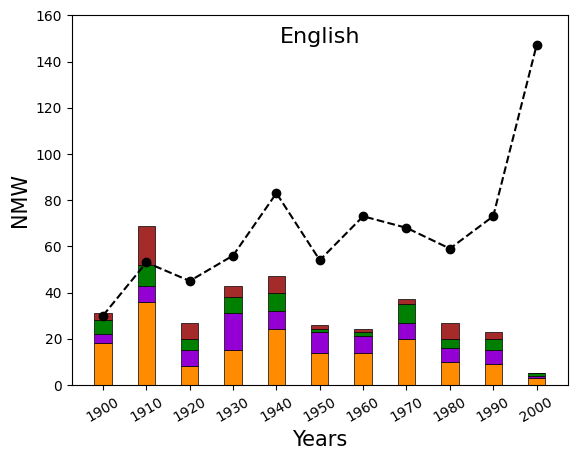

In [6]:
bar_width = 4
plt.bar(decades, french_to_english, width=bar_width, color="darkorange",edgecolor="black",linewidth=0.5 )
plt.bar(decades, german_to_english, bottom =french_to_english, 
        width=bar_width, color="darkviolet" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, italian_to_english, bottom = french_to_english + german_to_english,
        width=bar_width, color="green" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, spanish_to_english, bottom = french_to_english + german_to_english +italian_to_english  ,
        width=bar_width, color="brown" ,edgecolor="black",linewidth=0.5)

plt.plot(decades,from_english,marker="o",linestyle="--",color="black")


plt.ylabel("NMW",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.title("English",y=1 , pad = -20,fontsize=16)

plt.xticks(decades,rotation=30)
plt.ylim(0,160)
plt.savefig('Fig1_data/english_new.png',bbox_inches = "tight")
plt.show()



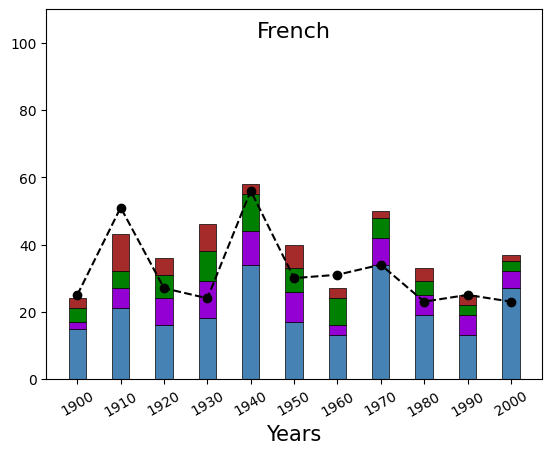

In [10]:
bar_width = 4
plt.bar(decades, english_to_french, width=bar_width, color="steelblue",edgecolor="black",linewidth=0.5 )
plt.bar(decades, german_to_french, bottom =english_to_french, 
        width=bar_width, color="darkviolet",edgecolor="black",linewidth=0.5 )
plt.bar(decades, italian_to_french, bottom = english_to_french + german_to_french,
        width=bar_width, color="green",edgecolor="black",linewidth=0.5 )
plt.bar(decades, spanish_to_french, bottom = english_to_french + german_to_french + 
        italian_to_french  ,  width=bar_width, color="brown" ,edgecolor="black",linewidth=0.5)

plt.plot(decades,from_french,marker="o",linestyle="--",color="black")
# plt.ylabel("NMW",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(decades)
plt.title("French",y=1 , pad = -20,fontsize=16)

plt.xticks(decades,rotation=30)
plt.ylim(0,110)


plt.savefig('Fig1_data/french_new.png',bbox_inches = "tight")

plt.show()

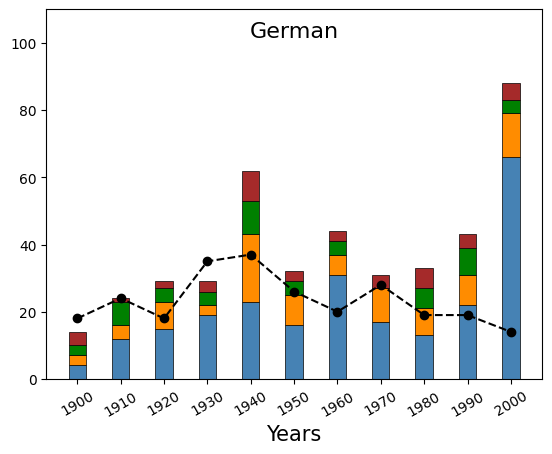

In [11]:
bar_width = 4
plt.bar(decades, english_to_german, width=bar_width, color="steelblue",edgecolor="black",linewidth=0.5 )
plt.bar(decades, french_to_german, bottom =english_to_german, 
        width=bar_width, color="darkorange" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, italian_to_german, bottom = english_to_german + french_to_german,
        width=bar_width, color="green" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, spanish_to_german, bottom = english_to_german + french_to_german + 
        italian_to_german  ,  width=bar_width, color="brown" ,edgecolor="black",linewidth=0.5)

plt.plot(decades,from_german,marker="o",linestyle="--",color="black")
# plt.ylabel("NMW",fontsize=15)
plt.xlabel("Years",fontsize=15)

plt.xticks(decades,rotation=30)

plt.title("German",y=1,pad =-20,fontsize=16)
plt.ylim(0,110)

plt.savefig('Fig1_data/german_new.png',bbox_inches = "tight")

plt.show()

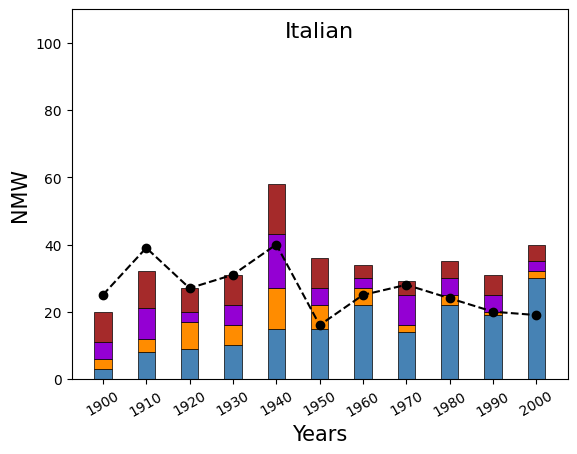

In [12]:
bar_width = 4
plt.bar(decades, english_to_italian, width=bar_width, color="steelblue",edgecolor="black",linewidth=0.5 )
plt.bar(decades, french_to_italian, bottom =english_to_italian, 
        width=bar_width, color="darkorange" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, german_to_italian, bottom = english_to_italian + french_to_italian,
        width=bar_width, color="darkviolet" ,edgecolor="black",linewidth=0.5)
plt.bar(decades, spanish_to_italian, bottom = english_to_italian + french_to_italian + 
        german_to_italian  ,  width=bar_width, color="brown" ,edgecolor="black",linewidth=0.5)

plt.plot(decades,from_italian,marker="o",linestyle="--",color="black")
plt.ylabel("NMW",fontsize=15)
plt.xlabel("Years",fontsize=15)

plt.xticks(decades,rotation=30)

plt.title("Italian",y=1,pad =-20,fontsize=16)
plt.ylim(0,110)

plt.savefig('Fig1_data/italian_new.png',bbox_inches = "tight")

plt.show()

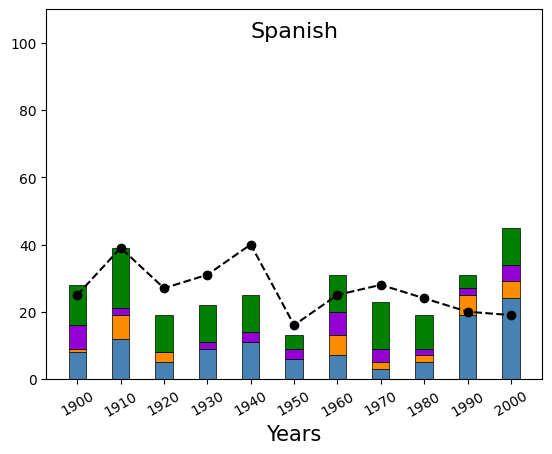

In [13]:
bar_width = 4
plt.bar(decades, english_to_spanish, width=bar_width, color="steelblue",edgecolor="black",linewidth=0.5 )
plt.bar(decades, french_to_spanish, bottom =english_to_spanish, 
        width=bar_width, color="darkorange",edgecolor="black",linewidth=0.5 )
plt.bar(decades, german_to_spanish, bottom = english_to_spanish + french_to_spanish,
        width=bar_width, color="darkviolet",edgecolor="black",linewidth=0.5 )
plt.bar(decades, italian_to_spanish, bottom = english_to_spanish + french_to_spanish + 
        german_to_spanish  ,  width=bar_width, color="green",edgecolor="black",linewidth=0.5 )

plt.plot(decades,from_italian,marker="o",linestyle="--",color="black")
# plt.ylabel("NMW",fontsize=15)
plt.xlabel("Years",fontsize=15)

plt.xticks(decades,rotation=30)

plt.title("Spanish",y=1,pad =-20,fontsize=16)
plt.ylim(0,110)

plt.savefig('Fig1_data/spanish_new.png',bbox_inches = "tight")

plt.show()

## See all results

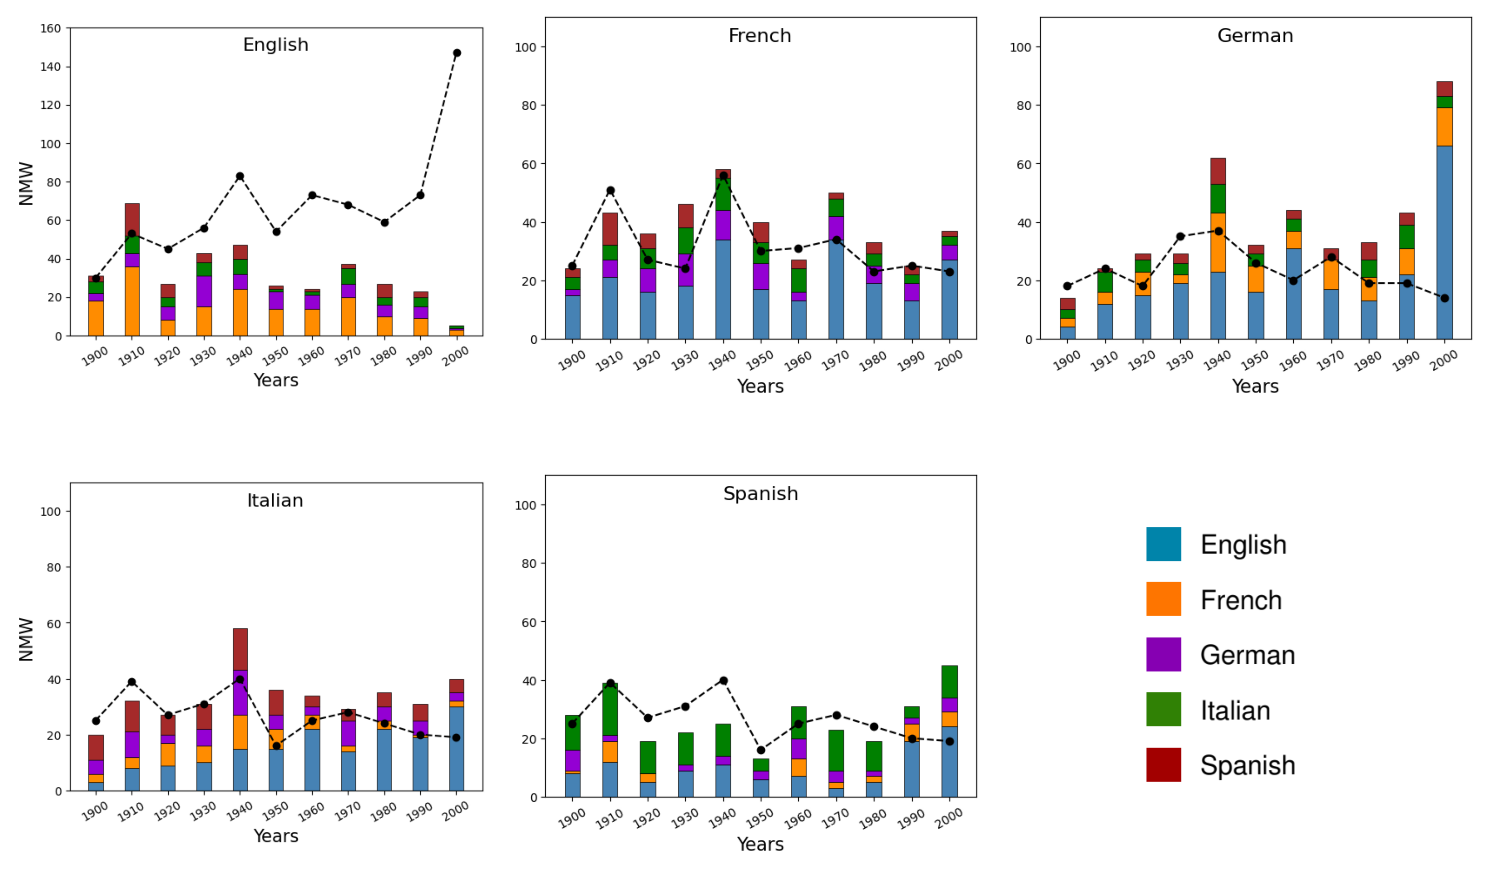

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define file paths for your PNG images
file_paths = ["Fig1_data/english_new.png", "Fig1_data/french_new.png", "Fig1_data/german_new.png",
              "Fig1_data/italian_new.png", "Fig1_data/spanish_new.png", "Fig1_data/legend.png"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, (file_path, ax) in enumerate(zip(file_paths, axes)):
    img = mpimg.imread(file_path)  
    ax.imshow(img)  
    ax.axis('off')  

plt.tight_layout()  
plt.show()




Create final image:

In [20]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch

# --- handlers ---

class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]


class HandlerCircle(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        r = 5
        x = r + width//2
        y = height//2

        # create 
        p = patches.Circle(xy=(x, y), radius=r)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]


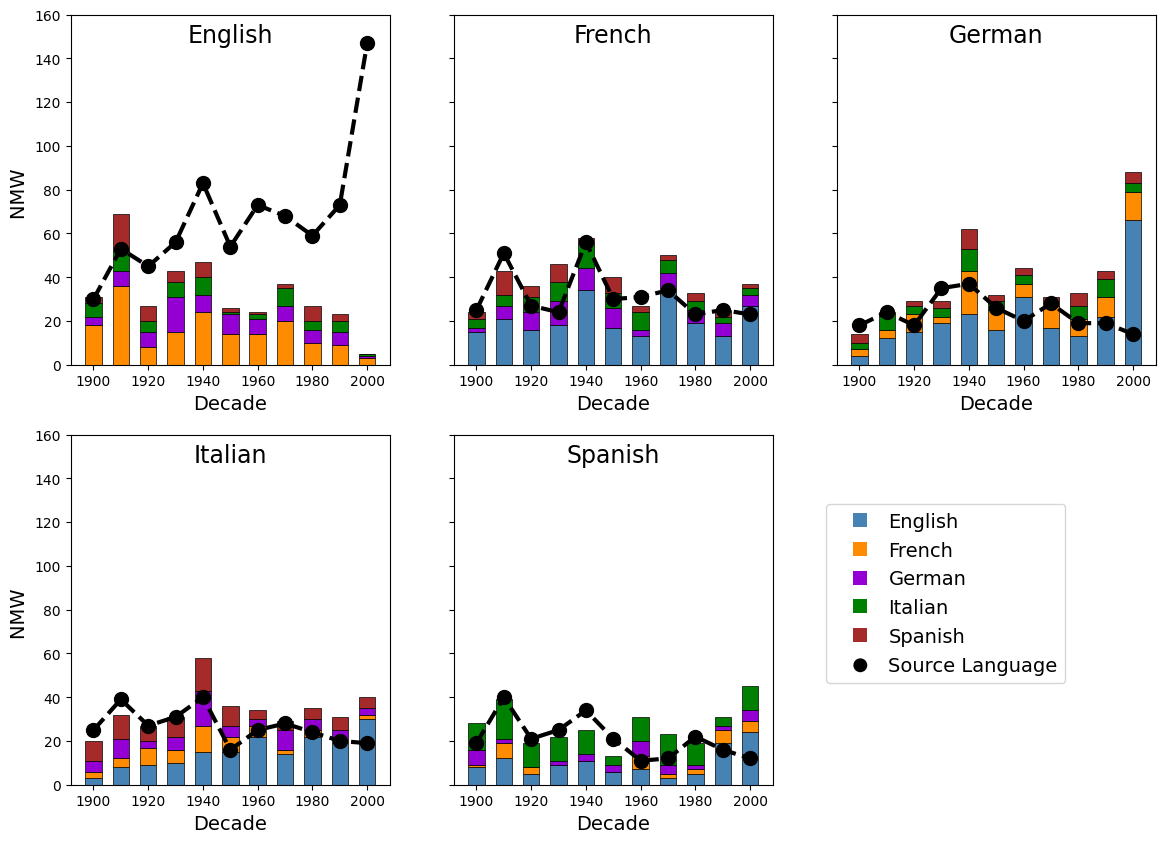

In [21]:
decades = np.arange(1900,2010,10)
languages = ["english","french","german","italian","spanish"]
languagesM = ["English","French","German","Italian","Spanish"]
# exc = ["","_exc_all","_exc_none"]

ex = "_exc_all"
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}
# exclude_title = ["exclude each", "exclude all", "exclude none"]

bar_width = 6

dicc = {}


# fig = plt.figure(figsize=(12, 10))

# Define the grid layout
fig = plt.figure(figsize=(14,10))
import matplotlib as mpl

spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])

axs = [ax1,ax2,ax3,ax4,ax5]

    
    
# fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey=True)
till_now = np.array([[0]*11]*5)
    
for j,lan in enumerate(languages):

    total = []
    
    
    for k,lan2 in enumerate(languages):
        if lan == lan2:
            continue
                    
        nuevo = [len(migrants(lan2,lan,
                                    range(year,year+10),ex)) for year in decades]
            
            
        total.append( [len(migrants(lan,lan2,
                                    range(year,year+10),ex)) for year in decades])
            
            
        dicc[lan2+"_"+lan+ex] = nuevo
                
            
        axs[j].bar(decades,nuevo,width=bar_width,
                         color = colors[lan2],edgecolor="black",linewidth=0.5,
                         bottom = till_now[j])
        
        
        till_now[j] = np.array(till_now[j])+nuevo
                
        
        axs[j].set_ylim([0,160])
        axs[j].set_title(languagesM[j],y=1,pad=-20,fontsize=17)
            
    dicc[lan+ex] = list(np.array(total).sum(axis=0))
    axs[j].plot(decades,np.array(total).sum(axis=0),marker="o",linestyle="--",color="black",
               linewidth=3,markersize=10)

    
    
axs[0].set_ylabel("NMW ",fontsize=14)
axs[3].set_ylabel("NMW ",fontsize=14)
axs[2].set_xlabel("Decade",fontsize=14)
axs[3].set_xlabel("Decade",fontsize=14)
axs[4].set_xlabel("Decade",fontsize=14)

axs[0].set_xlabel("Decade",fontsize=14)
axs[1].set_xlabel("Decade",fontsize=14)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
axs[4].set_yticklabels([])

# axs[0].set_xticklabels([])
# axs[1].set_xticklabels([])


import matplotlib.patches as mpatches

brown_patch = mpatches.Patch(color='brown', label='Spanish')
green_patch = mpatches.Patch(color='green', label='Italian')
darkviolet_patch = mpatches.Patch(color='darkviolet', label='German')
darkorange_patch = mpatches.Patch(color='darkorange', label='French')
steelblue_patch = mpatches.Patch(color='steelblue', label='English')
black_patch = mpatches.Patch(color="black",label="Source Language")

# plt.plot(2000,1,markersize=0.001,label="Source Language",
#             color="black",marker="o")

rectb = patches.Rectangle((0,0), 1, 1, facecolor='brown')
rectg = patches.Rectangle((0,0), 1, 1, facecolor='green')
rectd = patches.Rectangle((0,0), 1, 1, facecolor='darkviolet')
rectdo= patches.Rectangle((0,0), 1, 1, facecolor='darkorange')
rects = patches.Rectangle((0,0), 1, 1, facecolor='steelblue')
circ =  patches.Circle((0,0), 1, facecolor='Black')

plt.legend((rects,rectdo,rectd,rectg,rectb,circ),
        ("English","French","German","Italian","Spanish","Source Language"),
        handler_map = {
            patches.Rectangle: HandlerRect(),
            patches.Circle: HandlerCircle()
            },
          loc="upper center",
           ncol=1,
    bbox_to_anchor=(0.75, 0.4),
    bbox_transform=fig.transFigure ,
          fontsize=14
          )
#     handles=[brown_patch,green_patch,darkviolet_patch,darkorange_patch,steelblue_patch,d],      
#     loc="upper center",
#     ncol=1,
#     bbox_to_anchor=(0.75, 0.4),
#     bbox_transform=fig.transFigure ,
#           fontsize=14)

plt.savefig('Fig1_data/image' + ex + '_new.png',bbox_inches = "tight")
plt.savefig('Fig1_data/image' + ex + '_new.pdf',bbox_inches = "tight")
